# 4. Let's try text analysis!

There are so many things you can do with text analysis! Create visualizations, convert text to tables, or compare texts. In this notebook we are going to do all three.

## 1. We need to pick a dataset

How about music lyrics? There is an API called MusiXmatch that allows for non-commerical use of their API, which includes lyrics. This only allows for 30% of the lyrics, but we will use it anyway for practice. I was able to get access to this API with my .edu email address. There are a lot of APIs that will allow for education access.

First we need to get the lyrics. I did this making an API call to MusiXmatch. Let's pick a band or musician and a song. Any suggestions?

In [1]:
import Constants
import json
import re

In [4]:
from musixmatch import Musixmatch

music_key=Constants.MUSIXMATCH_KEY

musixmatch = Musixmatch(music_key)

lyrics = musixmatch.matcher_lyrics_get('Hey Ya!', 'OutKast')
lyrics = re.sub(r"\\n", " ", json.dumps(lyrics["message"]["body"]["lyrics"]["lyrics_body"]))
lyrics = re.sub(r"(.+)(\.\.\..+)", r"\1", lyrics)

print (lyrics)


"One, two, three, uh!  My baby don't mess around Because she loves me so And this I know for sure (uh) But does she really wanna But can't stand to see me walk out the door (ah)  Don't try to fight the feeling 'Cause the thought alone is killin' me right now (uh) Thank God for mom and dad For sticking two together 'Cause we don't know how (c'mon)  Hey ya! Hey ya! Hey ya! Hey ya!  Hey ya! Hey ya! Hey ya! Hey ya!  You think you've got it Oh, you think you've got it But got it just don't get it when there's nothin' at all We get together Oh, we get together But separate's always better when there's feelings involved 


## 2. Convert the text to tokens

Great! Now we have the song lyrics as text named `lyrics`. What can we do with it now? Let's start by turning the lyrics into tokens using spaCy.

In [5]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(lyrics)
print(doc)
print (len(lyrics))
print (len(doc))

"One, two, three, uh!  My baby don't mess around Because she loves me so And this I know for sure (uh) But does she really wanna But can't stand to see me walk out the door (ah)  Don't try to fight the feeling 'Cause the thought alone is killin' me right now (uh) Thank God for mom and dad For sticking two together 'Cause we don't know how (c'mon)  Hey ya! Hey ya! Hey ya! Hey ya!  Hey ya! Hey ya! Hey ya! Hey ya!  You think you've got it Oh, you think you've got it But got it just don't get it when there's nothin' at all We get together Oh, we get together But separate's always better when there's feelings involved 
621
163


The lyrics look the same, but we can see from the length difference between `lyrics` and `doc`, `doc` contains tokens. 

## 3. Create visualizations

One way to do text analysis is doing visualization of the parts of speech. SpaCy has a built in dependency visualizer:

In [6]:
from spacy import displacy

In [7]:
displacy.render(doc, style="dep", jupyter = True, options={'distance':140})

## 4. Convert entity tagging to tables

Creating a table out of the parts of speech will make it even easier to do data analysis. We could even compare to other songs! So let's start with using Pandas to convert our parts of speech analysis to a table with the counts of each parts of speech.

In [8]:
#!pip install pandas

In [9]:
import pandas as pd

In [10]:
list_of_strings  = [i.text for i in doc]
list_of_tokens = [j.pos_ for j in doc]

In [11]:
df = pd.DataFrame({'token': list_of_strings, 'POS': list_of_tokens })
#pd.DataFrame({'a':[1,2], 'b':[3,4]})

In [12]:
df['POS'].value_counts()

VERB     24
PUNCT    23
PRON     22
INTJ     16
NOUN     14
ADV      12
AUX      10
PART      8
SCONJ     6
CCONJ     6
SPACE     5
ADP       5
NUM       4
ADJ       3
DET       3
PROPN     2
Name: POS, dtype: int64

I want to see how this song compares to another. First, we need to bring in another song.

In [15]:
from musixmatch import Musixmatch

music_key=Constants.MUSIXMATCH_KEY

musixmatch = Musixmatch(music_key)

lyrics2 = musixmatch.matcher_lyrics_get('Ms. Jackson', 'OutKast')
lyrics2 = re.sub(r"\\n", " ", json.dumps(lyrics2["message"]["body"]["lyrics"]["lyrics_body"]))
lyrics2 = re.sub(r"(.+)(\.\.\..+)", r"\1", lyrics2)

print (lyrics2)

"Yeah this one right here goes out to all the baby's mamas, mamas Mamas, mamas, baby mamas, mamas Yeah, go like this  I'm sorry Ms. Jackson (oh), I am for real Never meant to make your daughter cry I apologize a trillion times I'm sorry Ms. Jackson (oh), I am for real Never meant to make your daughter cry I apologize a trillion times  My baby's drama mama, don't like me She be doing things like having them boys come from her neighborhood To the studio trying to fight me She need to get a, piece of the american pie and take her bite out That's my house, I'll disconnect the cable and turn the lights out And let her know her grandchild is a baby, and not a paycheck Private school, daycare, shit medical bills I pay that I love your mom and everything, but see I ain't the one who laid down She wanna rib you up to start a custody war, my lawyers stay down Shit you never got a chance to hear My side of the story we was divided She had fish fries and cookouts for My child's birthday I ain't in

In [16]:
doc2 = nlp(lyrics2)
print(doc2)
print (len(lyrics2))
print (len(doc2))

"Yeah this one right here goes out to all the baby's mamas, mamas Mamas, mamas, baby mamas, mamas Yeah, go like this  I'm sorry Ms. Jackson (oh), I am for real Never meant to make your daughter cry I apologize a trillion times I'm sorry Ms. Jackson (oh), I am for real Never meant to make your daughter cry I apologize a trillion times  My baby's drama mama, don't like me She be doing things like having them boys come from her neighborhood To the studio trying to fight me She need to get a, piece of the american pie and take her bite out That's my house, I'll disconnect the cable and turn the lights out And let her know her grandchild is a baby, and not a paycheck Private school, daycare, shit medical bills I pay that I love your mom and everything, but see I ain't the one who laid down She wanna rib you up to start a custody war, my lawyers stay down Shit you never got a chance to hear My side of the story we was divided She had fish fries and cookouts for My child's birthday I ain't in

In [17]:
list_of_strings2  = [k.text for k in doc2]
list_of_tokens2 = [l.pos_ for l in doc2]

In [18]:
df2 = pd.DataFrame({'token': list_of_strings2, 'POS': list_of_tokens2 })
#pd.DataFrame({'a':[1,2], 'b':[3,4]})

In [19]:
df2['POS'].value_counts()

PRON     51
NOUN     44
VERB     43
PUNCT    29
DET      19
ADP      19
PROPN    17
AUX      17
PART     14
ADJ      10
ADV       9
CCONJ     7
INTJ      6
SCONJ     4
SPACE     3
NUM       3
Name: POS, dtype: int64

This information is more accurate for comparison if we look at the percentages rather than the counts, so let's convert count to percent:

In [20]:
table2= df2['POS'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='Song 2')
table2['Song 2'] = table2['Song 2'] * 100
print(table2)

   unique_values     Song 2
0           PRON  17.288136
1           NOUN  14.915254
2           VERB  14.576271
3          PUNCT   9.830508
4            DET   6.440678
5            ADP   6.440678
6          PROPN   5.762712
7            AUX   5.762712
8           PART   4.745763
9            ADJ   3.389831
10           ADV   3.050847
11         CCONJ   2.372881
12          INTJ   2.033898
13         SCONJ   1.355932
14         SPACE   1.016949
15           NUM   1.016949


In [21]:
table= df['POS'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='Song 1')
table['Song 1'] = table['Song 1'] * 100

print(table)

   unique_values     Song 1
0           VERB  14.723926
1          PUNCT  14.110429
2           PRON  13.496933
3           INTJ   9.815951
4           NOUN   8.588957
5            ADV   7.361963
6            AUX   6.134969
7           PART   4.907975
8          SCONJ   3.680982
9          CCONJ   3.680982
10         SPACE   3.067485
11           ADP   3.067485
12           NUM   2.453988
13           ADJ   1.840491
14           DET   1.840491
15         PROPN   1.226994


Time to put our two tables together so the songs can be compared:

## Compare songs!

Now that the parts of speech are converted to tables, we can compare songs!

In [22]:
right = table
left = table2
result = pd.merge(left, right, on=['unique_values'])
print(result)

   unique_values     Song 2     Song 1
0           PRON  17.288136  13.496933
1           NOUN  14.915254   8.588957
2           VERB  14.576271  14.723926
3          PUNCT   9.830508  14.110429
4            DET   6.440678   1.840491
5            ADP   6.440678   3.067485
6          PROPN   5.762712   1.226994
7            AUX   5.762712   6.134969
8           PART   4.745763   4.907975
9            ADJ   3.389831   1.840491
10           ADV   3.050847   7.361963
11         CCONJ   2.372881   3.680982
12          INTJ   2.033898   9.815951
13         SCONJ   1.355932   3.680982
14         SPACE   1.016949   3.067485
15           NUM   1.016949   2.453988


This kind of comparison would be interesting as a bar chart. This makes it easier to visualize the differences. There is another tool, `matplotlib`, we can import which will make the table above into a graph so the song comparison can be visualized. 

In [23]:
#! pip install matplotlib

In [24]:
from matplotlib import pyplot as plt

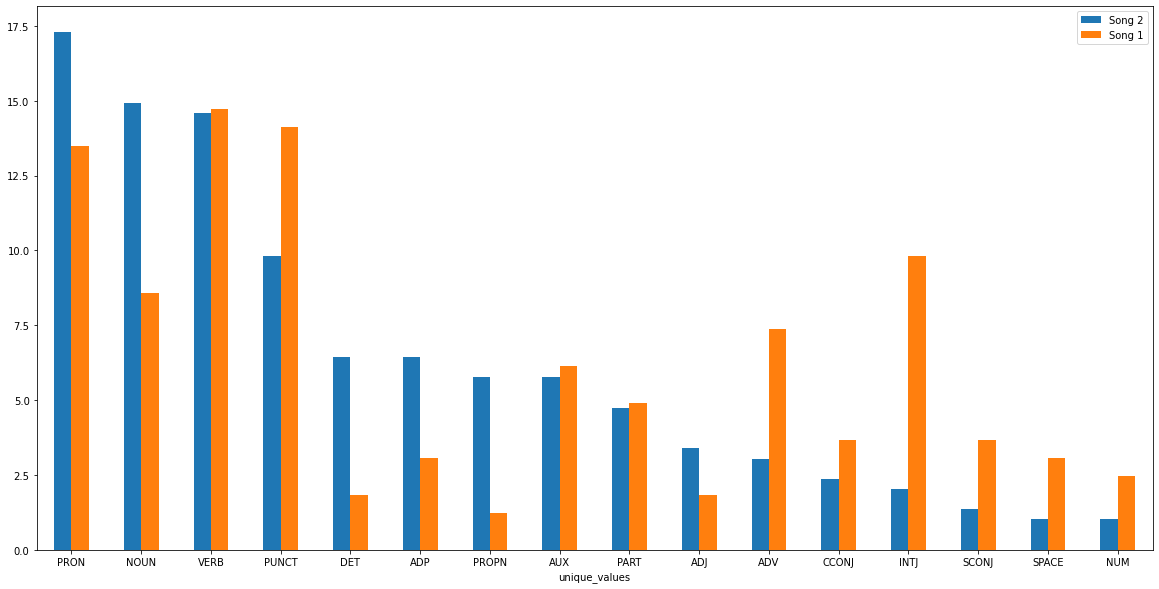

In [25]:
result['unique_values'] *100
result.plot.bar(x='unique_values', rot=0, figsize=(20, 10));

The nice part of Jupyter notebooks is that you can run through an entire text analysis, change your mind, and run things again differently. We might want to try removing spaces or punctuation from this comparision, for example. 